# **Breast Cancer Detection, A Data Science Project**

---
A study to predict diagnose breast cancer, using the machine learning methods from the features created by digitizing the images of breast cancer


In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Necessary imports for Random Forest classification, K-Means clustering, etc.

#  **Part 1**

---

### Reading, exploring, normalizing and clustering the data.

In [2]:
OD = pd.read_csv("data.csv")

In [3]:
# OD.dtypes
# OD["radius_mean"].describe()
# OD.describe(include = 'all')
# OD.info()


The data types of each column in my dataframe.
The information about columns.

In [4]:
OD.drop("Unnamed: 32", axis = 1, inplace = True)
OD.drop("id", axis = 1, inplace = True)

The first column contains credentials that do not contribute to guessing. Therefore, we must leave the identity columns. The last column is filled with NaN values. So these should also be lowered.

> The most important reason for removing the columns that will not contribute to the results from our dataframe is that the speed of the model we designed will increase.




In [5]:
ND = OD.copy()
NDnumpyarray = ND.iloc[:,1:].values

"diagnosis" column shouldn't be in the data while we are normalizing the data.

### **NORMALIZATION** 


In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
numpyarray_scaled = min_max_scaler.fit_transform(NDnumpyarray)
ND = pd.DataFrame(numpyarray_scaled)

Implementation of The Min-Max Normalization. The dataset of Normalization result of original data is ND.





In [7]:
OD_columns_list = ['radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'concavity',
       'concave', 'symmetry', 'fractal',
       'radius_s', 'texture_s', 'perimeter_s', 'area_s',
       'smoothness_s', 'compactness_s', 'concavity_s',
       'concave_s', 'symmetry_s', 'fractal_s',
       'radius_w', 'texture_w', 'perimeter_w', 'area_w',
       'smoothness_w', 'compactness_w', 'concavity_w',
       'concave_w', 'symmetry_w',
       'fractal_w', 'diagnosis']

Abbreviated feature names list for plots.

In [8]:
ND.columns = ["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]

Adding the column names to normalized dataframe. 
> Since we create the Normalized Dataframe from a numpy array the newly formed dataframe has no column names.



In [9]:
ND["diagnosis"] = OD.loc[:,["diagnosis"]]


Adding the "diagnosis" column to Normalized Dataframe.

> After the normalization process, "diagnosis" column can be added.



In [10]:
diagnosis = OD.loc[:,["diagnosis"]]
OD.drop("diagnosis", axis = 1, inplace = True)
OD["diagnosis"] = diagnosis

To make two dataframe look the same in terms of column, remove the "diagnosis" column from the beginning of the Original Dataframe and add the "diagnosis" column to the end of Original Dataframe.

In [11]:
replace_dict = {'M':1,'B':0}
OD = OD.replace({'diagnosis':replace_dict})

Replace the diagnosis symbols at Original Data. 1 for malignant, 0 for benign.

In [12]:
ND = ND.replace({'diagnosis':replace_dict})

Replace the diagnosis symbols at Normalized Data. 1 for malignant, 0 for benign.

### CORRELATION

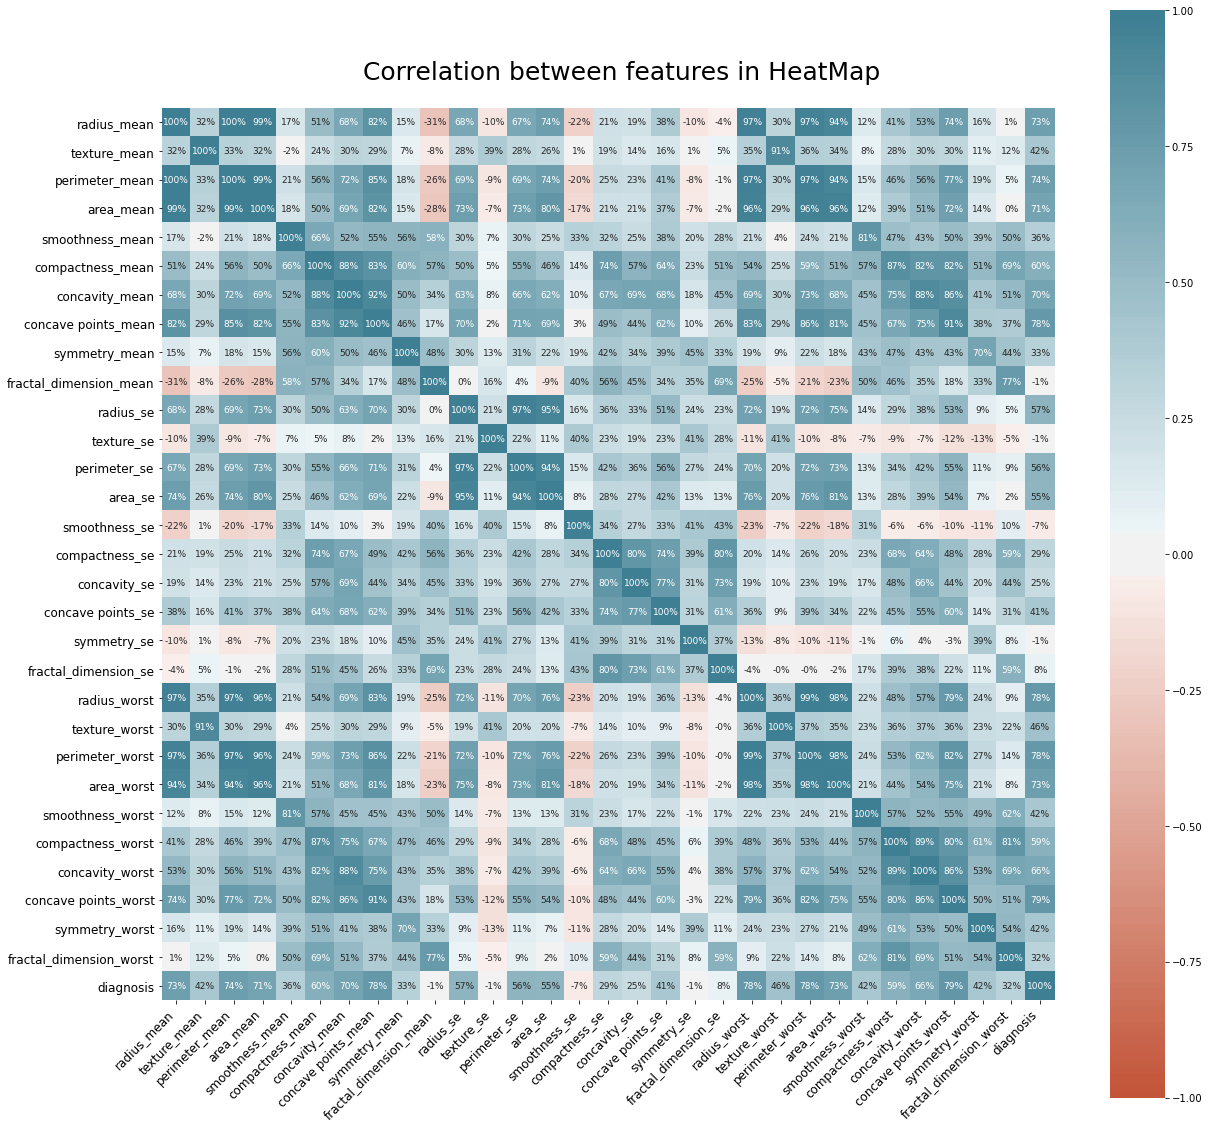

In [13]:
fig, ax = plt.subplots(figsize=(20,20))

corr = OD.corr()

sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt=".0%", annot_kws={"size": 9}, square=True, ax = ax)

ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right', fontsize = 12 );

ax.set_yticklabels(ax.get_yticklabels(), fontsize = 12);


plt.text(7,-1, "Correlation between features in HeatMap", fontsize = 25, color='Black')

plt.show()


To be able to see the correlations between the features, heatmap from seaborn is used. 

If we look at the plot, we see the darker blues in between highly correlated columns. Highly correlated columns says us that one of these columns can be dropped from dataframe if we want to decrease the size of the dataframe. But it is not necessary in the project because we have just 569 rows. 

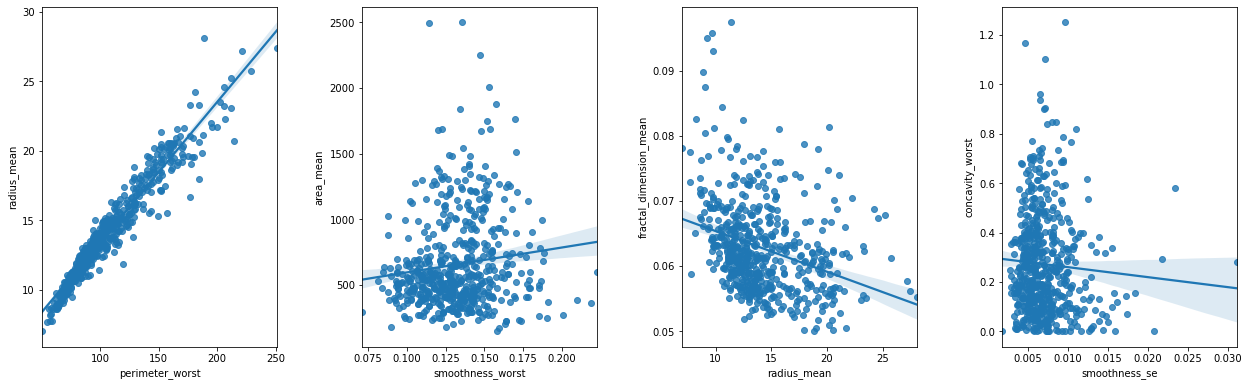

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18,6))

sns.regplot(x = 'perimeter_worst', y = 'radius_mean',data = OD, marker='o', ax=axes[0])
sns.regplot(x = 'smoothness_worst', y = 'area_mean',data = OD, marker='o', ax=axes[1])
sns.regplot(x = 'radius_mean', y = 'fractal_dimension_mean',data = OD, marker='o', ax=axes[2])
sns.regplot(x = 'smoothness_se', y = 'concavity_worst',data = OD, marker='o', ax=axes[3])

fig.tight_layout(pad=3.0)

plt.show()


We have drawn some of features separately to see the relations more clearly.As we can see clearly, the correlation figures shows that some features have negative correlation among them. And also some of correlations are really close to the 1. Which  means we can discard one of them. Let's do the same thing to the normalized dataset.

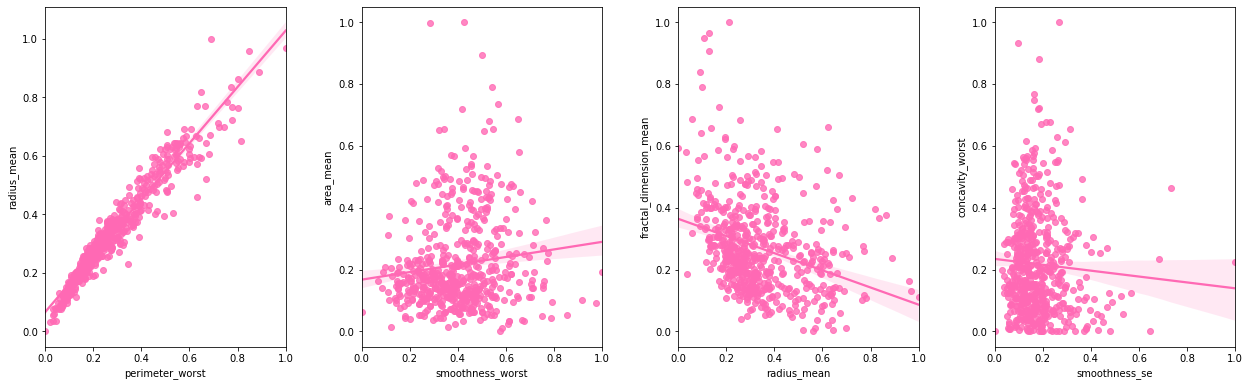

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18,6))

sns.regplot(x = 'perimeter_worst', y = 'radius_mean',data = ND, marker='o', color = 'hotpink', ax=axes[0])
sns.regplot(x = 'smoothness_worst', y = 'area_mean',data = ND, marker='o',color = 'hotpink', ax=axes[1])
sns.regplot(x = 'radius_mean', y = 'fractal_dimension_mean',data = ND, marker='o',color = 'hotpink', ax=axes[2])
sns.regplot(x = 'smoothness_se', y = 'concavity_worst',data = ND, marker='o',color = 'hotpink', ax=axes[3])

fig.tight_layout(pad=3.0)

plt.show()

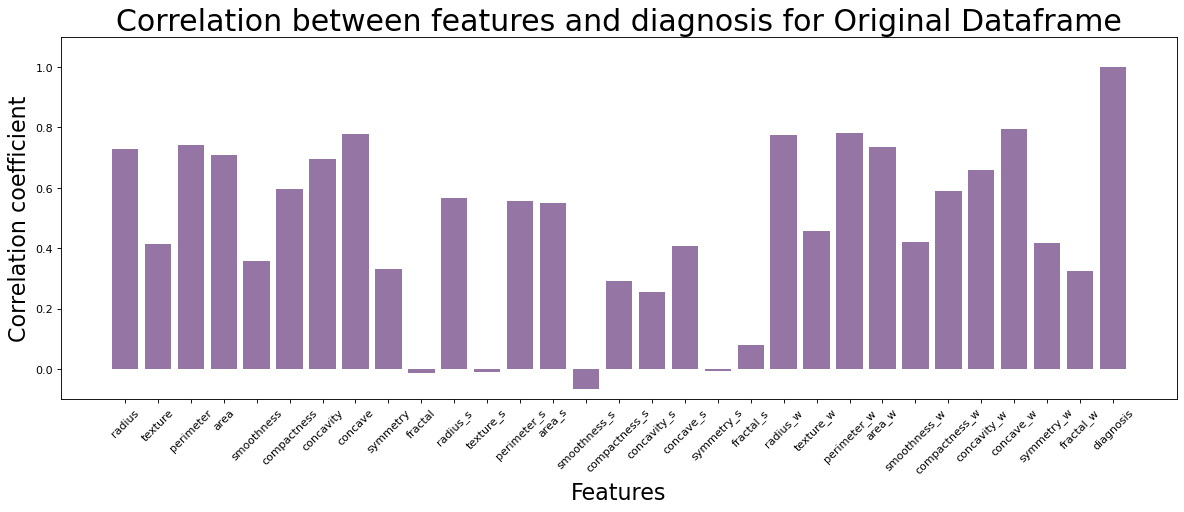

In [16]:
corr_OD_fig = plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
corr_OD = corr_OD_fig.add_subplot(111)
correlations_OD =[]

for column in OD.columns:
    # print('Correlation between '+ column + ' and ' + 'diagnosis : ', np.corrcoef(np.array(OD[column]), np.array(OD['diagnosis']))[0][1])
    correlations_OD.append(np.corrcoef(np.array(OD[column]), np.array(OD['diagnosis']))[0][1])

plt.bar(OD_columns_list,  correlations_OD, color = (0.3,0.1,0.4,0.6))       

plt.title('Correlation between features and diagnosis for Original Dataframe',fontsize=27)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Correlation coefficient',fontsize=20)    

plt.ylim(-0.1,1.1)
plt.xticks(rotation=45)
plt.show()    
    

It is showed the relationship between features and diagnosis to find out which feature is more effective for finding the diagnosis. 

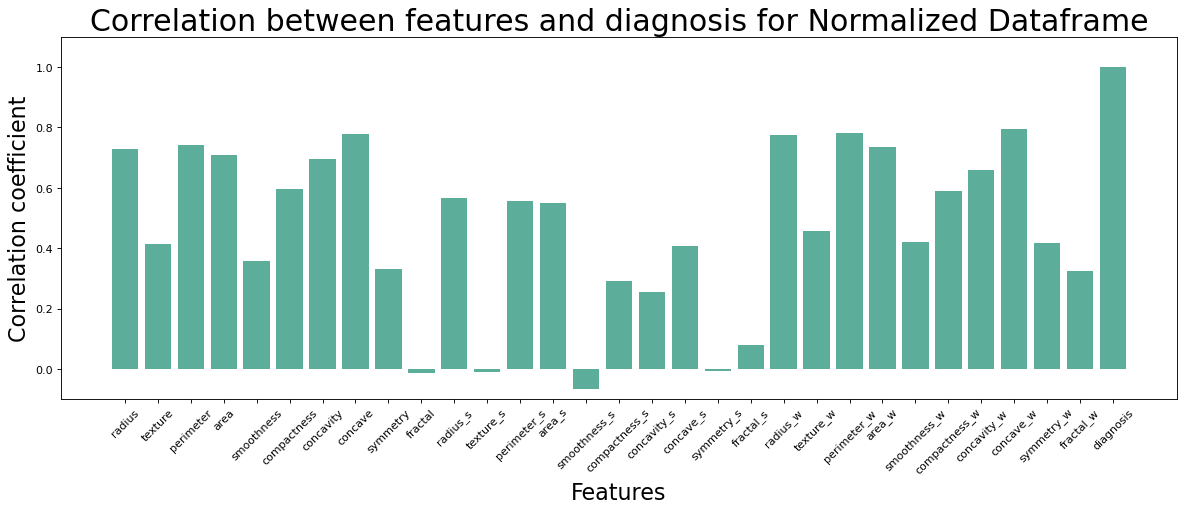

In [17]:
corr_ND_fig = plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
corr_ND = corr_ND_fig.add_subplot(111)
correlations_ND =[]

for column in ND.columns:
    # print('Correlation between '+ column + ' and ' + 'diagnosis : ', np.corrcoef(np.array(ND[column]), np.array(ND['diagnosis']))[0][1])
    correlations_ND.append(np.corrcoef(np.array(ND[column]), np.array(ND['diagnosis']))[0][1])

plt.bar(OD_columns_list,  correlations_ND, color = (0.2,0.6,0.5,0.8))       

plt.title('Correlation between features and diagnosis for Normalized Dataframe',fontsize=27)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Correlation coefficient',fontsize=20)    

plt.ylim(-0.1,1.1)
plt.xticks(rotation=45)
plt.show()    
    

By looking at these two graphs, it was determined that the min-max normalization of the original data did not affect the correlation between the features and diagnosis.

 ### CLUSTERING

In [18]:
kmeans = KMeans(n_clusters = 2)

Selected clustering algorithm is K-means. 

In [19]:
clustered_array = StandardScaler().fit_transform(OD.iloc[:,:-1])


Create a numpy array from Original Dataframe to run K-means algorithm without "diagnosis" column.

In [20]:
model = kmeans.fit(clustered_array) 
OD_clustered_part1 = OD.copy()
OD_clustered_part1["diagnosis_clustered"] = kmeans.predict(clustered_array)

Implementation of K-means clustering algorithm to Original Dataframe.

In [21]:
clustered_array_ND = StandardScaler().fit_transform(ND.iloc[:,:-1])

Create a numpy array from Normalized Dataframe to run K-means algorithm without "diagnosis" column.

In [22]:
model_ND = kmeans.fit(clustered_array_ND) 
ND_clustered_part1 = ND.copy()
ND_clustered_part1["diagnosis_clustered"] = kmeans.predict(clustered_array_ND)

Implementation of K-means clustering algorithm to Normalized Dataframe.

In [23]:
benign_count_OD = 0
clustered_benign_count_OD = 0
malignant_count_OD = 0
clustered_malignant_count_OD = 0

for key, value in OD_clustered_part1.iterrows():
    if value[-2] == 0:
        malignant_count_OD = malignant_count_OD + 1 
    elif value[-2] == 1:
        benign_count_OD = benign_count_OD + 1 
    if value[-1] == 0:
        clustered_malignant_count_OD = clustered_malignant_count_OD + 1 
    elif value[-1] == 1:
        clustered_benign_count_OD = clustered_benign_count_OD + 1 
    

Calculation of real malignant-benign count and malignant-benign count after K-means clustering in the Original Dataframe.

In [24]:
benign_count_ND = 0
clustered_benign_count_ND = 0
malignant_count_ND = 0
clustered_malignant_count_ND = 0

for key, value in ND_clustered_part1.iterrows():
    if value[-2] == 0:
        malignant_count_ND = malignant_count_ND + 1 
    elif value[-2] == 1:
        benign_count_ND = benign_count_ND + 1 
    if value[-1] == 0:
        clustered_malignant_count_ND = clustered_malignant_count_ND + 1 
    elif value[-1] == 1:
        clustered_benign_count_ND = clustered_benign_count_ND + 1 
    

Calculation of real malignant-benign count and malignant-benign count after K-means clustering in the Normalized Dataframe.

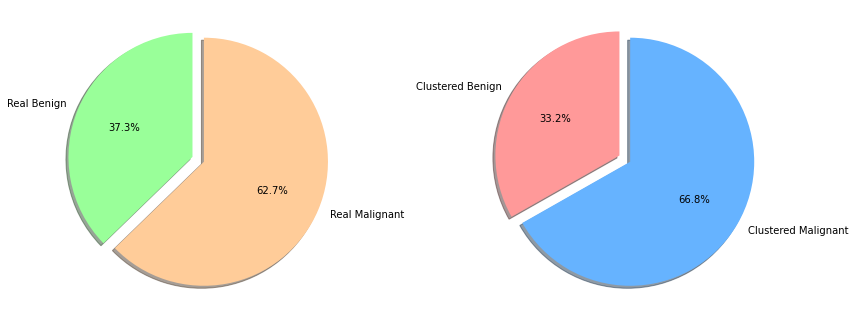

In [25]:
labels1 = ['Real Benign', 'Real Malignant']
sizes1 = [benign_count_OD, malignant_count_OD]

explode = (0.1, 0)

colors1 = ['#99ff99','#ffcc99']


labels2 = ['Clustered Benign', 'Clustered Malignant']
sizes2 = [clustered_benign_count_OD, clustered_malignant_count_OD]

colors2 = ['#ff9999','#66b3ff']

fig_OD_pie, ax_OD_pie = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

ax_OD_pie[0].pie(sizes1, labels=labels1, explode=explode, colors=colors1, 
                 autopct='%1.1f%%', shadow=True, startangle=90)


ax_OD_pie[1].pie(sizes2, labels=labels2, explode=explode, colors=colors2, 
                 autopct='%1.1f%%', shadow=True, startangle=90)

fig_OD_pie.tight_layout()
plt.show()

    Distribution of real diagnosis in Original Dataframe and distribution of clustered diagnosis in Original Dataframe

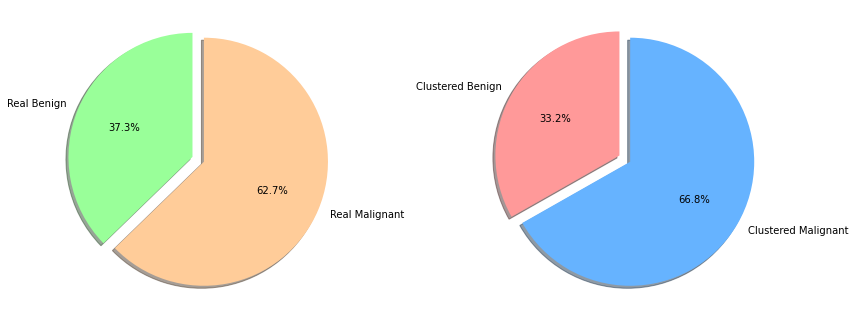

In [26]:
labels1 = ['Real Benign', 'Real Malignant']
sizes1 = [benign_count_ND, malignant_count_ND]

explode = (0.1, 0)

colors1 = ['#99ff99','#ffcc99']


labels2 = ['Clustered Benign', 'Clustered Malignant']
sizes2 = [clustered_benign_count_ND, clustered_malignant_count_ND]

colors2 = ['#ff9999','#66b3ff']

fig_ND_pie, ax_ND_pie = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

ax_ND_pie[0].pie(sizes1, labels=labels1, explode=explode, colors=colors1, 
                 autopct='%1.1f%%', shadow=True, startangle=90)


ax_ND_pie[1].pie(sizes2, labels=labels2, explode=explode, colors=colors2, 
                 autopct='%1.1f%%', shadow=True, startangle=90)

fig_ND_pie.tight_layout()
plt.show()

    Distribution of real diagnosis in Normalized Dataframe and distribution of clustered diagnosis in Normalized Dataframe

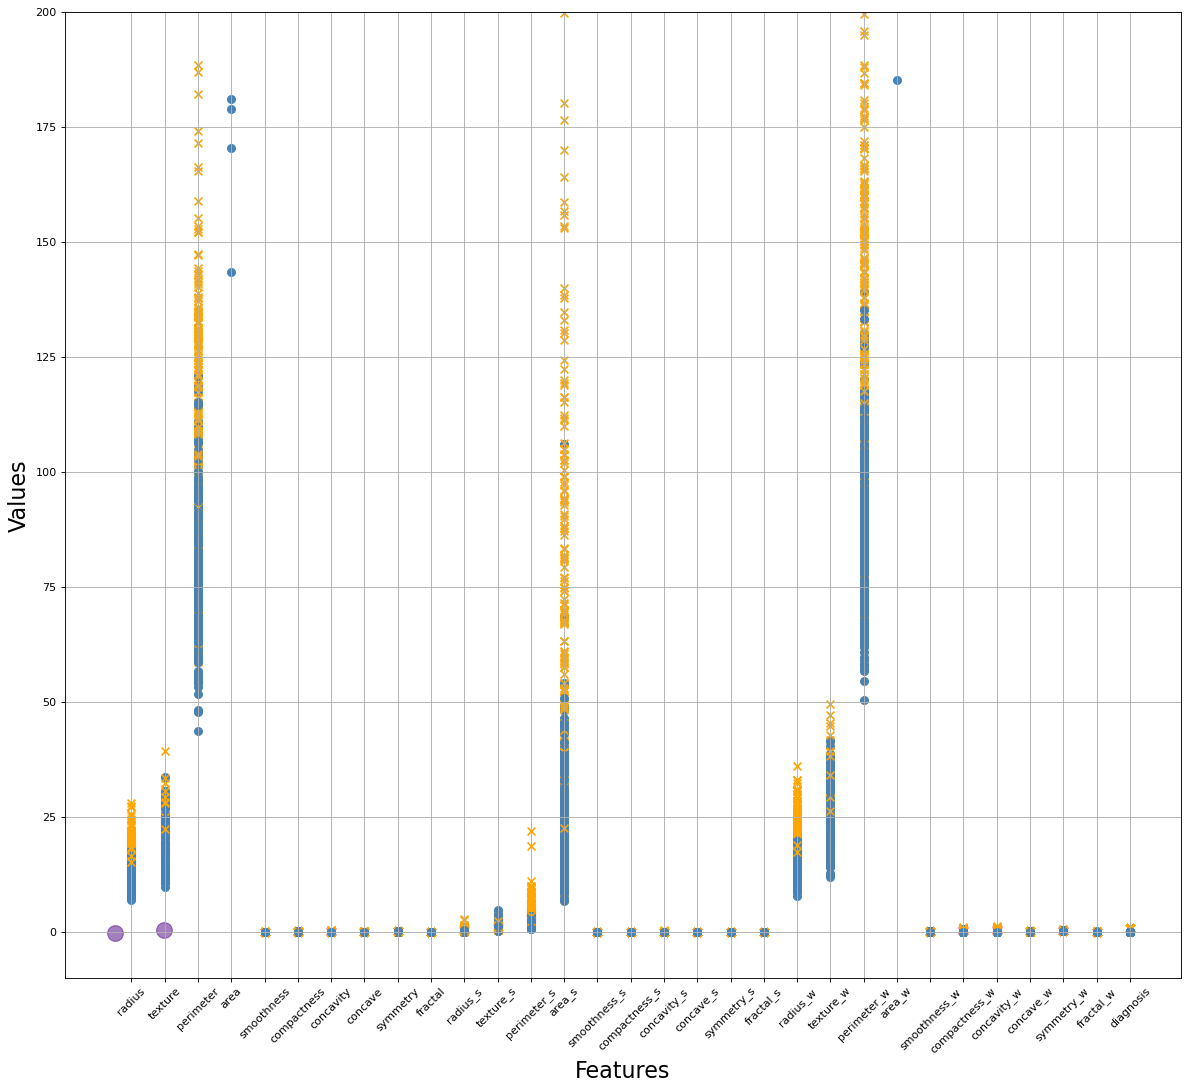

In [27]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax3 = fig.add_subplot(111)
i = 0

OD_clustered_part12 = OD_clustered_part1.copy()
OD_clustered_part12.drop("diagnosis", axis = 1, inplace = True)

for index, row in OD_clustered_part12.iterrows():
    if row[-1] == 0 : 
        ax3.scatter(x = OD_columns_list,y = OD_clustered_part12.iloc[i,:] , s=50, c= 'steelblue', marker = 'o') 
    elif row[-1] == 1 :
        ax3.scatter(x = OD_columns_list,y = OD_clustered_part12.iloc[i,:] , s=50, c= 'orange', marker = 'x') 
      
    i= i + 1
    

plt.xlabel('Features',fontsize=20)
plt.ylabel('Values',fontsize=20)        
plt.xticks(rotation=45)   
plt.ylim((-10,200))
plt.grid(True)
    
centers = kmeans.cluster_centers_
ax3.scatter(centers[:, 0], centers[:, 1], c='indigo', s=200, alpha=0.5);

plt.show()


The center points of K-means clusters for Original Dataframe are shown.

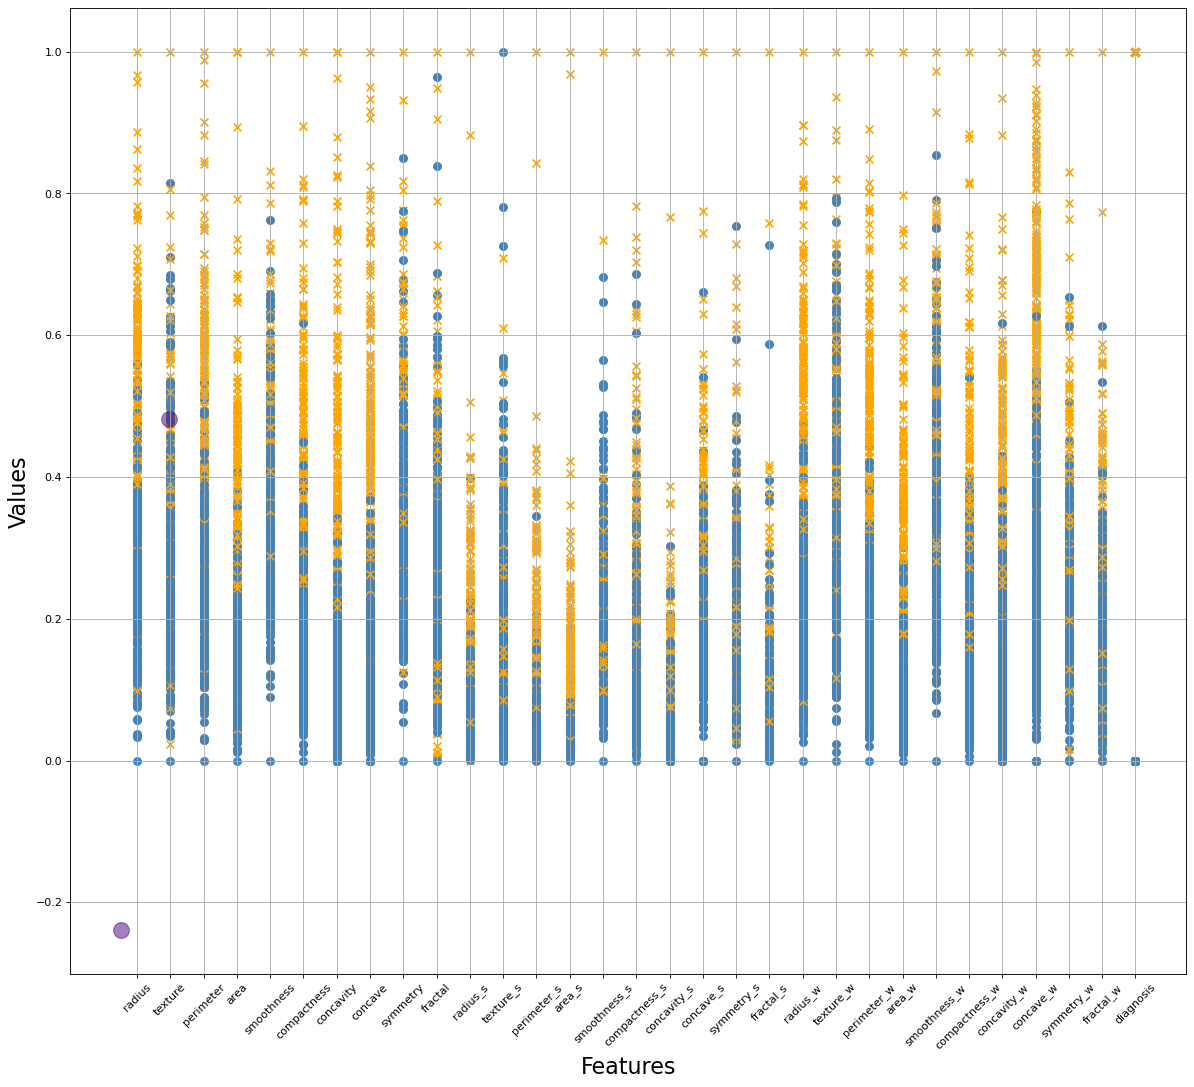

In [28]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax4 = fig.add_subplot(111)
i = 0
ND_clustered_part12 = ND_clustered_part1.copy()
ND_clustered_part12.drop("diagnosis", axis = 1, inplace = True)
#y_kmeans = kmeans.predict(X)

for index, row in ND_clustered_part12.iterrows():
    if row[-1] == 0 : 
        ax4.scatter(x = OD_columns_list,y = ND_clustered_part12.iloc[i,:] , s=50, c= 'steelblue', marker = 'o') 
    elif row[-1] == 1 :
        ax4.scatter(x = OD_columns_list,y = ND_clustered_part12.iloc[i,:] , s=50, c= 'orange', marker = 'x') 
    i= i + 1
    
    
plt.xlabel('Features',fontsize=20)
plt.ylabel('Values',fontsize=20)        
plt.xticks(rotation=45)
plt.grid(True)

centers = kmeans.cluster_centers_
ax4.scatter(centers[:, 0], centers[:, 1], c='indigo', s=200, alpha=0.5);
plt.show()


The center points of K-means clusters for Original Dataframe are shown.

### CONCLUSION

   After the implementation K-means algorithm we can see that the real diagnosis and the clustered diagnosis values is pretty similar. To show this similarty, pie charts help us to visualize this in percentages of the benign-malignent relationship. When looking at the results, Normalization of the original dataset is important because the process made our model more accurate. If we look at the center points of K-means clusters, we can see the points are at different positions. Then, we can say the normalization process operated clustering algorithm from a different perspective. 
   
   Different execution of this program shows that the accuracy of the model with Original Dataset ∼(more or less) %95-%96.
   The accuracy of the model with Normalized Dataset ∼(more or less) %96-%97.

# PART 2

In [29]:
X_train_OD, X_test_OD, y_train_OD, y_test_OD = train_test_split(OD.iloc[:,:-1], OD.iloc[:,[-1]], train_size = 0.7, test_size = 0.3, random_state = 0)
#print ("X_train: ", X_train_OD)
#print ("y_train: ", y_train_OD)
#print("X_test: ", X_test_OD)
#print ("y_test: ", y_test_OD)


Spliting the Original Dataframe into training and test sets. But the splitting process is not recommended for normalized datasets. So after the splitting the Original Dataframe, we normalized each of the parts.

In [30]:

min_max_scaler = preprocessing.MinMaxScaler()
X_train_ND = pd.DataFrame(min_max_scaler.fit_transform(X_train_OD))
X_test_ND = pd.DataFrame(min_max_scaler.transform(X_test_OD))
y_train_ND = pd.DataFrame(min_max_scaler.fit_transform(y_train_OD))
y_test_ND = pd.DataFrame(min_max_scaler.transform(y_test_OD))

X_train_ND.columns = ["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]
X_test_ND.columns = ["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"]

y_train_ND.columns = ["diagnosis"]
y_test_ND.columns = ["diagnosis"]

#print ("X_train: ", X_train_ND)
#print("X_test: ", X_test_ND)
#print ("y_train: ", y_train_ND)
#print ("y_test: ", y_test_ND)

After splitting the Original Dataframe, normalization process is done and we should add the column names to normalized dataframe. 
> Since we create the Normalized Dataframe from a numpy array the newly formed dataframes has no column names.



### CLASSIFICATION


Accuracy: %95.32


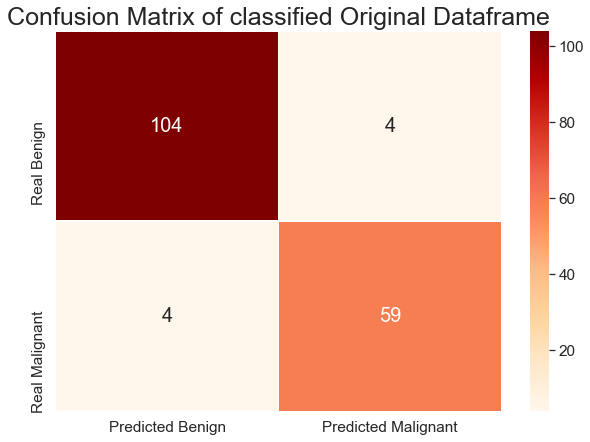

In [31]:
regressor_OD = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor_OD.fit(X_train_OD, y_train_OD.values.ravel())
y_pred_OD = regressor_OD.predict(X_test_OD)

confusion_matrix_OD = pd.DataFrame(confusion_matrix(y_test_OD,y_pred_OD.round()), index = ["Real Benign","Real Malignant"],
                  columns = ["Predicted Benign", "Predicted Malignant"])

plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix_OD, annot=True, annot_kws={"size": 20}, fmt="d", linewidths=.5, cmap="OrRd")
plt.title('Confusion Matrix of classified Original Dataframe', size = 25)

#print(classification_report(y_test_OD,y_pred_OD.round()))

print("\nAccuracy: "+ "%" + "%5.2f" %(accuracy_score(y_test_OD, y_pred_OD.round())*100))


Implementation of Random Forest Algorithm as classification to Original Dataframe.


Accuracy: %95.91


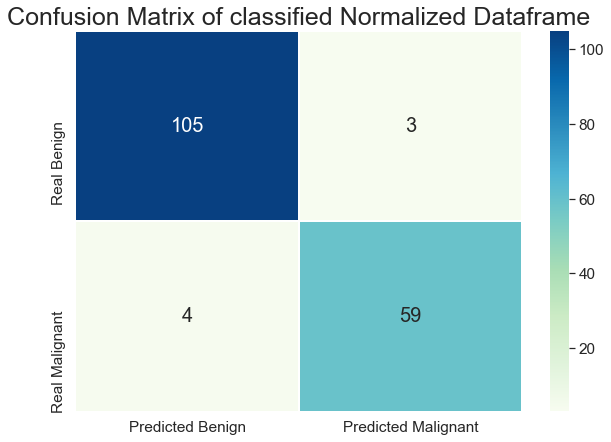

In [32]:
regressor_ND = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor_ND.fit(X_train_ND, y_train_ND.values.ravel())
y_pred_ND = regressor_ND.predict(X_test_ND)

confusion_matrix_ND = pd.DataFrame(confusion_matrix(y_test_ND,y_pred_ND.round()), index = ["Real Benign","Real Malignant"],
                  columns = ["Predicted Benign", "Predicted Malignant"])


plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap(confusion_matrix_ND, annot=True, annot_kws={"size": 20}, fmt="d", linewidths=.5, cmap="GnBu")
plt.title('Confusion Matrix of classified Normalized Dataframe', size = 25)


#print(classification_report(y_test_ND,y_pred_ND.round()))

print("\nAccuracy: "+ "%" + "%5.2f" %(accuracy_score(y_test_ND, y_pred_ND.round())*100))


Implementation of Random Forest Algorithm as classification to Normalized Dataframe.

By looking at the confusion matrix obtained as a result of the classification process, it is seen that the normalized data gives more accurate results with the Random Forest Algorithm.

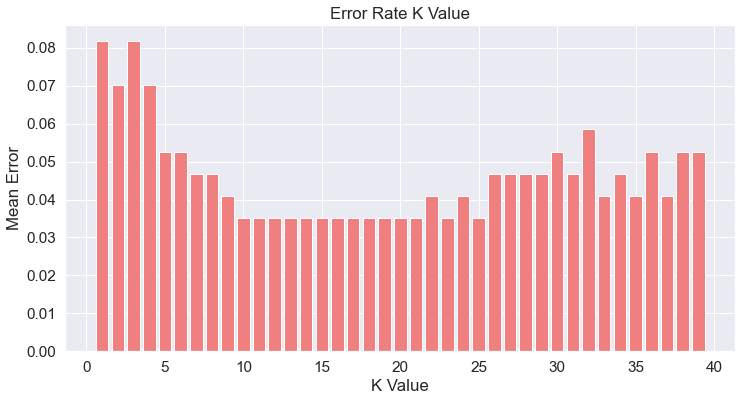

In [33]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_OD, y_train_OD.values.ravel())
    pred_i = knn.predict(X_test_OD)
    error.append(np.mean(pred_i != y_test_OD.values.ravel()))
    
plt.figure(figsize=(12, 6))
plt.bar(range(1, 40), error, color='lightcoral')
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

Calculating error for K values between 1 and 40 to find the best K value for KNN Algorithm. This plot shows us K value should be between 10 and 21. So we run the KNN Algorithm with k=10.


	Accuracy : %94.74 						  Accuracy: %96.49


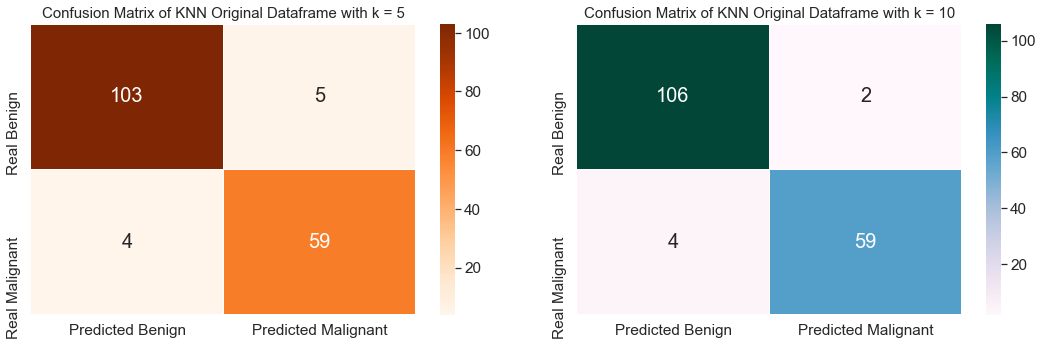

In [34]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_OD, y_train_OD.values.ravel())
y_pred_knn_OD_5 = classifier.predict(X_test_OD)

classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train_OD, y_train_OD.values.ravel())
y_pred_knn_OD_10 = classifier.predict(X_test_OD)

#print(classification_report(y_test_OD, y_pred_knn_OD))

print("\n\tAccuracy : "+ "%" + "%5.2f" %(accuracy_score(y_test_OD, y_pred_knn_OD_5)*100), "\t\t\t\t\t\t  Accuracy: "+ "%" + "%5.2f" %(accuracy_score(y_test_OD, y_pred_knn_OD_10)*100))


confusion_matrix_OD_knn_5 = pd.DataFrame(confusion_matrix(y_test_OD, y_pred_knn_OD_5), index = ["Real Benign","Real Malignant"],
                  columns = ["Predicted Benign", "Predicted Malignant"])

confusion_matrix_OD_knn_10 = pd.DataFrame(confusion_matrix(y_test_OD, y_pred_knn_OD_10), index = ["Real Benign","Real Malignant"],
                  columns = ["Predicted Benign", "Predicted Malignant"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.set(font_scale = 1.4)

sns.heatmap(confusion_matrix_OD_knn_5, annot=True, annot_kws={"size": 20}, fmt="d", linewidths=.5, cmap="Oranges", ax = axes[0]).set_title('Confusion Matrix of KNN Original Dataframe with k = 5', size = 15)
sns.heatmap(confusion_matrix_OD_knn_10, annot=True, annot_kws={"size": 20}, fmt="d", linewidths=.5, cmap="PuBuGn", ax = axes[1]).set_title('Confusion Matrix of KNN Original Dataframe with k = 10', size = 15)


fig.tight_layout(pad=3.0)

plt.show()

After measuring the errors of k value as seen in confusion matrices, we get a better accuracy rate for this project than the Random Forest Algorithm for Original Dataframe. Let's try it for Normalized dataset.

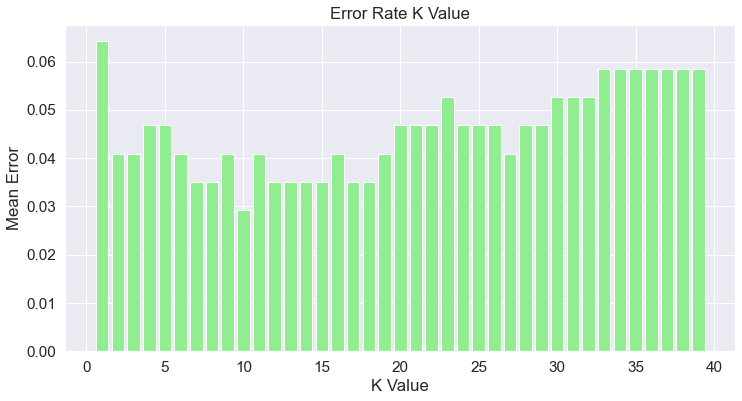

In [35]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_ND, y_train_ND.values.ravel())
    pred_i = knn.predict(X_test_ND)
    error.append(np.mean(pred_i != y_test_ND.values.ravel()))
    
plt.figure(figsize=(12, 6))
plt.bar(range(1, 40), error, color='lightgreen')
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

This bar chart shows us, the mean error is min at k = 10. So let's compare the accuracies at k = 5 and k = 10.


	Accuracy : %95.32 						  Accuracy: %97.08


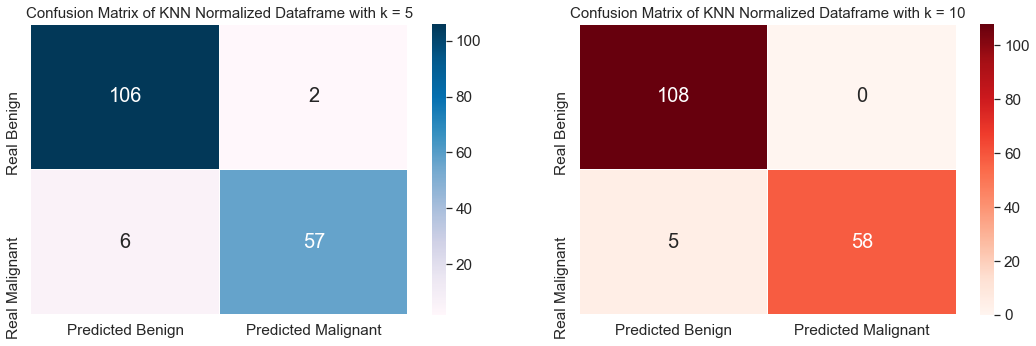

In [36]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_ND, y_train_ND.values.ravel())
y_pred_knn_ND_5 = classifier.predict(X_test_ND)

classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train_ND, y_train_ND.values.ravel())
y_pred_knn_ND_10 = classifier.predict(X_test_ND)

#print(classification_report(y_test_OD, y_pred_knn_ND))

print("\n\tAccuracy : "+ "%" + "%5.2f" %(accuracy_score(y_test_ND, y_pred_knn_ND_5)*100), "\t\t\t\t\t\t  Accuracy: "+ "%" + "%5.2f" %(accuracy_score(y_test_ND, y_pred_knn_ND_10)*100))


confusion_matrix_ND_knn_5 = pd.DataFrame(confusion_matrix(y_test_ND, y_pred_knn_ND_5), index = ["Real Benign","Real Malignant"],
                  columns = ["Predicted Benign", "Predicted Malignant"])

confusion_matrix_ND_knn_10 = pd.DataFrame(confusion_matrix(y_test_ND, y_pred_knn_ND_10), index = ["Real Benign","Real Malignant"],
                  columns = ["Predicted Benign", "Predicted Malignant"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.set(font_scale = 1.4)

sns.heatmap(confusion_matrix_ND_knn_5, annot=True, annot_kws={"size": 20}, fmt="d", linewidths=.5, cmap="PuBu", ax = axes[0]).set_title('Confusion Matrix of KNN Normalized Dataframe with k = 5', size = 15)
sns.heatmap(confusion_matrix_ND_knn_10, annot=True, annot_kws={"size": 20}, fmt="d", linewidths=.5, cmap="Reds", ax = axes[1]).set_title('Confusion Matrix of KNN Normalized Dataframe with k = 10', size = 15)


fig.tight_layout(pad=3.0)

plt.show()

When the confusion matrices are compared, we see that the best result with normalized data and the the error values ​​are obtained by KNN classification with the lowest calculated k value.

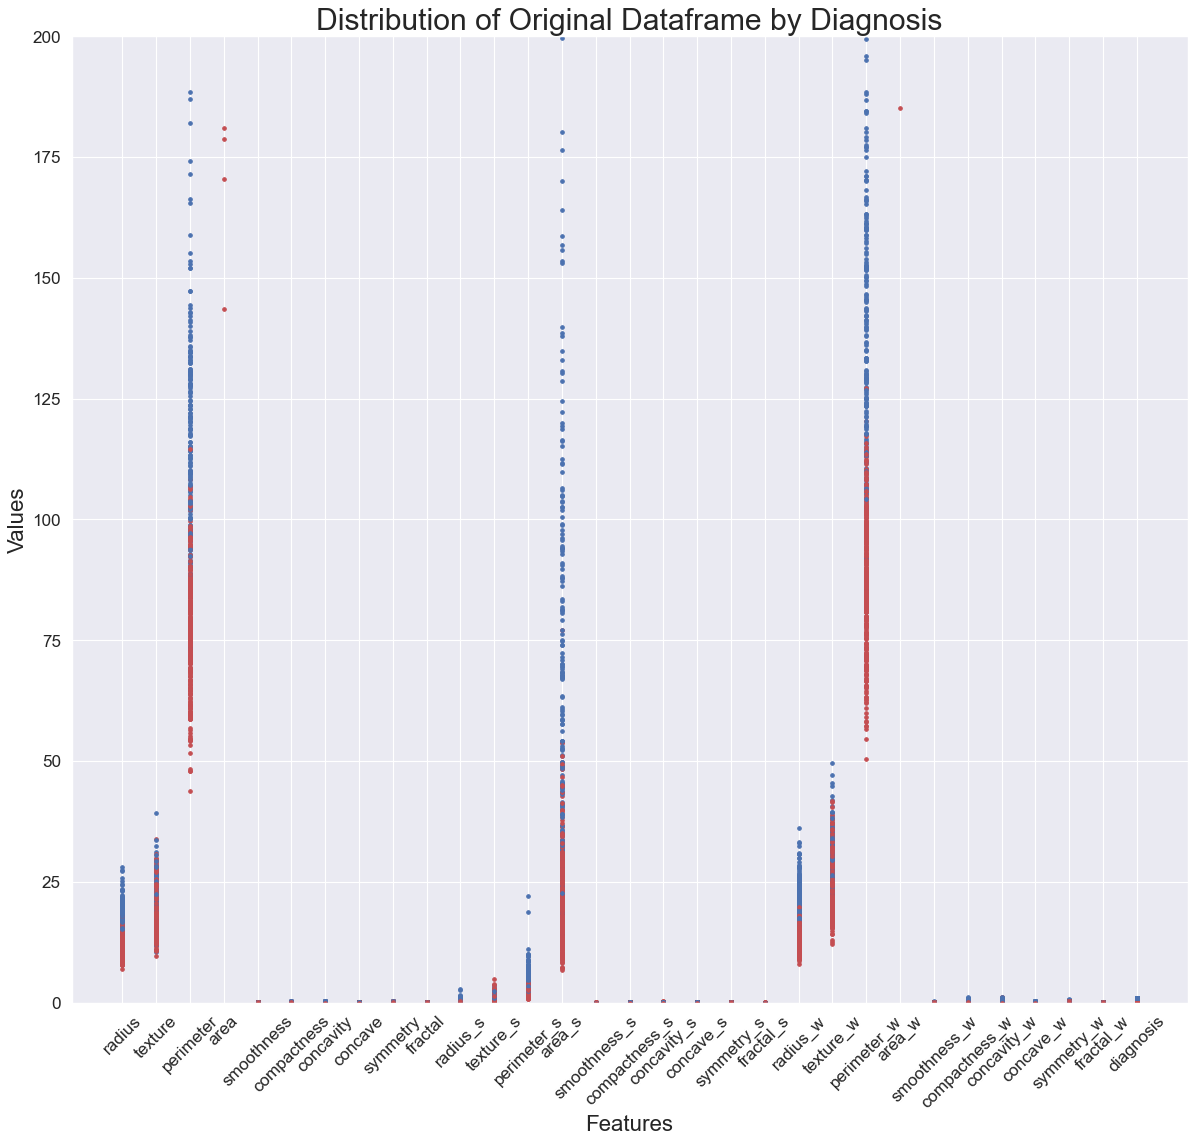

In [37]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax2 = fig.add_subplot(111)
i = 0

for index, row in OD.iterrows():
    if row['diagnosis'] == 0 : 
        ax2.scatter(x = OD_columns_list, y = OD.iloc[[i],:] , s=10, c='r', marker="o")
    elif row['diagnosis'] == 1 :
        ax2.scatter(x = OD_columns_list, y = OD.iloc[[i],:] , s=10, c='b', marker="o")
    else : 
        ax2.scatter(x = OD_columns_list, y = OD.iloc[[i],:], s=10, c='g', marker="o")
    i= i + 1
    
plt.title('Distribution of Original Dataframe by Diagnosis',fontsize=27)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Values',fontsize=20)    

plt.ylim((0,200))

plt.xticks(rotation=45)
plt.show()


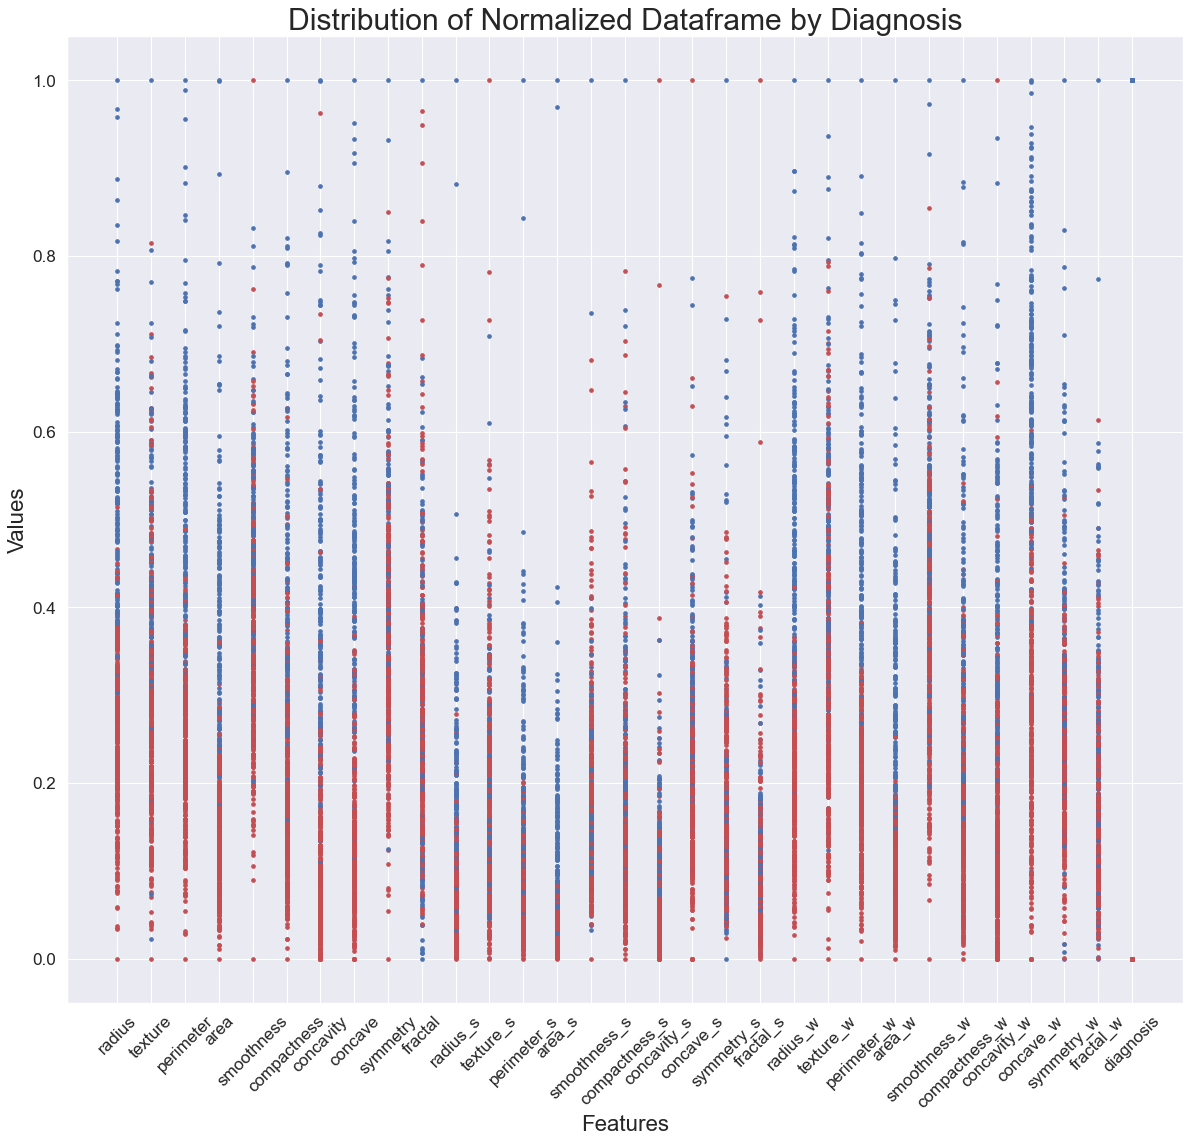

In [38]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(111)
i = 0

for index, row in ND.iterrows():
    if row['diagnosis'] == 0 : 
        ax1.scatter(x = OD_columns_list, y = ND.iloc[[i],:] , s=10, c='r', marker="o")
    elif row['diagnosis'] == 1 :
        ax1.scatter(x = OD_columns_list, y = ND.iloc[[i],:] , s=10, c='b', marker="o")
    else : 
        ax1.scatter(x = OD_columns_list, y = ND.iloc[[i],:], s=10, c='g', marker="o")
    i= i + 1
    
plt.title('Distribution of Normalized Dataframe by Diagnosis',fontsize=27)
plt.xlabel('Features',fontsize=20)
plt.ylabel('Values',fontsize=20)        

plt.xticks(rotation=45)
plt.show()



We can see the distribution of diagnostic data in these two graphs. However, we can compare all the features proportionally with normalized data.